# Final Project 
### Vehicle Crashes in NY 2014-2016

## Load the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
df = pd.read_csv('Motor_Vehicle_Crashes.csv')
print(df.shape)
df.head(2)

(1048575, 19)


,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
Year                                 1048575 non-null int64
Case Vehicle ID                      1048575 non-null int64
Vehicle Body Type                    1048575 non-null object
Registration Class                   1048575 non-null object
Action Prior to Accident             1048575 non-null object
Type / Axles of Truck or Bus         1048575 non-null object
Direction of Travel                  1048575 non-null object
Fuel Type                            1048575 non-null object
Vehicle Year                         890678 non-null float64
State of Registration                965273 non-null object
Number of Occupants                  917269 non-null float64
Engine Cylinders                     834192 non-null float64
Vehicle Make                         891552 non-null object
Contributing Factor 1                1048552 non-null object
Contributing Factor 1 Description    

## Clean the Data

In [5]:
df.columns

Index(['Year', 'Case Vehicle ID', 'Vehicle Body Type', 'Registration Class',
       'Action Prior to Accident', 'Type / Axles of Truck or Bus',
       'Direction of Travel', 'Fuel Type', 'Vehicle Year',
       'State of Registration', 'Number of Occupants', 'Engine Cylinders',
       'Vehicle Make', 'Contributing Factor 1',
       'Contributing Factor 1 Description', 'Contributing Factor 2',
       'Contributing Factor 2 Description', 'Event Type', 'Partial VIN'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("[ ]", "_")

In [7]:
df.columns

Index(['Year', 'Case_Vehicle_ID', 'Vehicle_Body_Type', 'Registration_Class',
       'Action_Prior_to_Accident', 'Type_/_Axles_of_Truck_or_Bus',
       'Direction_of_Travel', 'Fuel_Type', 'Vehicle_Year',
       'State_of_Registration', 'Number_of_Occupants', 'Engine_Cylinders',
       'Vehicle_Make', 'Contributing_Factor_1',
       'Contributing_Factor_1_Description', 'Contributing_Factor_2',
       'Contributing_Factor_2_Description', 'Event_Type', 'Partial_VIN'],
      dtype='object')

In [8]:
df = df.dropna()

In [9]:
print(df.shape)

(765135, 19)


In [10]:
# There are three variables that are saved as float, but we want to have as integer.
df['Vehicle_Year'] = df['Vehicle_Year'].astype(int)
df['Number_of_Occupants'] = df['Number_of_Occupants'].astype(int)
df['Engine_Cylinders'] = df['Engine_Cylinders'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765135 entries, 0 to 1048574
Data columns (total 19 columns):
Year                                 765135 non-null int64
Case_Vehicle_ID                      765135 non-null int64
Vehicle_Body_Type                    765135 non-null object
Registration_Class                   765135 non-null object
Action_Prior_to_Accident             765135 non-null object
Type_/_Axles_of_Truck_or_Bus         765135 non-null object
Direction_of_Travel                  765135 non-null object
Fuel_Type                            765135 non-null object
Vehicle_Year                         765135 non-null int32
State_of_Registration                765135 non-null object
Number_of_Occupants                  765135 non-null int32
Engine_Cylinders                     765135 non-null int32
Vehicle_Make                         765135 non-null object
Contributing_Factor_1                765135 non-null object
Contributing_Factor_1_Description    765135 non-null 

In [11]:
df = df.drop(columns='Case_Vehicle_ID')

In [12]:
df = df.drop(columns='Partial_VIN')

## Exploratory Data Analysis

In [15]:
#Easier to read pandas numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format 

df.describe(include='all')

,Year,Vehicle_Body_Type,Registration_Class,Action_Prior_to_Accident,Type_/_Axles_of_Truck_or_Bus,Direction_of_Travel,Fuel_Type,Vehicle_Year,State_of_Registration,Number_of_Occupants,Engine_Cylinders,Vehicle_Make,Contributing_Factor_1,Contributing_Factor_1_Description,Contributing_Factor_2,Contributing_Factor_2_Description,Event_Type
count,765135.00,765135,765135,765135,765135,765135,765135,765135.00,765135,765135.00,765135.00,765135,765135,765135,765135,765135,765135
unique,nan,48,63,21,16,10,9,nan,3,nan,nan,940,3,57,3,57,35
top,nan,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,nan,NY,nan,nan,TOYOT,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable
freq,nan,345177,657192,388170,765089,168953,733942,nan,765133,nan,nan,94705,723411,332964,691938,309077,455432
mean,2014.51,NaN,NaN,NaN,NaN,NaN,NaN,2007.19,NaN,1.38,5.31,NaN,NaN,NaN,NaN,NaN,NaN
std,0.50,NaN,NaN,NaN,NaN,NaN,NaN,5.54,NaN,1.36,1.44,NaN,NaN,NaN,NaN,NaN,NaN
min,2014.00,NaN,NaN,NaN,NaN,NaN,NaN,1923.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014.00,NaN,NaN,NaN,NaN,NaN,NaN,2004.00,NaN,1.00,4.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.00,NaN,NaN,NaN,NaN,NaN,NaN,2008.00,NaN,1.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2015.00,NaN,NaN,NaN,NaN,NaN,NaN,2012.00,NaN,2.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['Vehicle_Make'].value_counts()[:10]

TOYOT    94705
FORD     84829
HONDA    83306
CHEVR    82184
NISSA    61024
DODGE    35923
HYUND    33822
JEEP     30915
SUBAR    20580
CHRYS    16766
Name: Vehicle_Make, dtype: int64

In [13]:
df['Vehicle_Make_Count'] = df['Vehicle_Make'].map(df['Vehicle_Make'].value_counts()) 

In [18]:
df.head()

,Year,Vehicle_Body_Type,Registration_Class,Action_Prior_to_Accident,Type_/_Axles_of_Truck_or_Bus,Direction_of_Travel,Fuel_Type,Vehicle_Year,State_of_Registration,Number_of_Occupants,Engine_Cylinders,Vehicle_Make,Contributing_Factor_1,Contributing_Factor_1_Description,Contributing_Factor_2,Contributing_Factor_2_Description,Event_Type,Vehicle_Make_Count
0,2016,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012,NY,1,4,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,1259
1,2016,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014,NY,2,6,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,82184
2,2016,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007,NY,1,4,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,83306
3,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011,NY,4,4,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,82184
4,2016,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004,NY,1,6,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",10631


In [14]:
df = df[df['Vehicle_Make_Count'] > 5000]

In [20]:
df['Contributing_Factor_1_Description'].value_counts()[:5]

Not Applicable                     314845
Not Entered                        152590
Driver Inattention/Distraction*     43650
Following Too Closely               34539
Failure to Yield Right-of-Way       32741
Name: Contributing_Factor_1_Description, dtype: int64

In [21]:
df['Action_Prior_to_Accident'].value_counts()[:10]

Going Straight Ahead    366572
Stopped in Traffic       70022
Slowing or Stopping      63679
Making Left Turn         61746
Unknown                  31308
Parked                   24293
Making Right Turn        24089
Backing                  24059
Changing Lanes           15760
Starting in Traffic      12189
Name: Action_Prior_to_Accident, dtype: int64

In [22]:
print(df.shape)

(723646, 18)


In [23]:
df['Event_Type'].value_counts()[:5]

Not Applicable                                                  431193
Not Entered                                                     223178
Other Motor Vehicle, Collision With                              29699
Tree, Collision With Fixed Object                                 5179
Earth Embankment/Rock Cut/Ditch, Collision With Fixed Object      4171
Name: Event_Type, dtype: int64

In [24]:
df['Vehicle_Body_Type'].value_counts()[:5]

4 DOOR SEDAN    338956
SUBURBAN        267950
PICKUP TRUCK     53288
2 DOOR SEDAN     34923
VAN TRUCK        11156
Name: Vehicle_Body_Type, dtype: int64

# Plots

In [26]:
plt_df = (df
 .groupby(['Vehicle_Year'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

C:\Users\laure\Anaconda3\lib\site-packages\plotnine\layer.py:431: UserWarning: position_stack : Removed 52 rows containing missing values.
  data = self.position.setup_data(self.data, params)


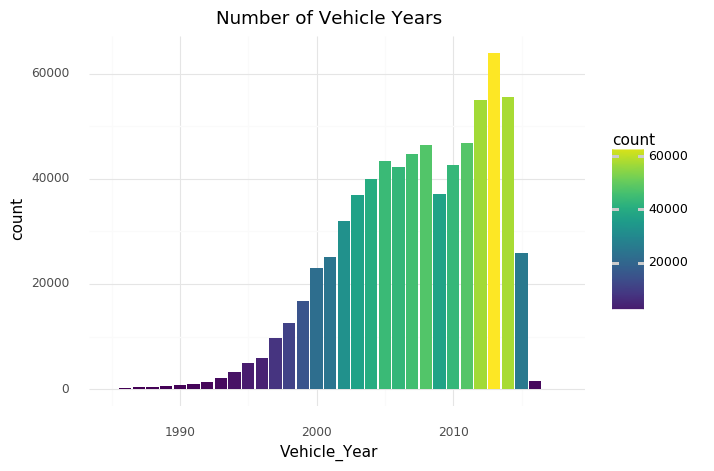

<ggplot: (-9223371954400370951)>

In [27]:
(ggplot(plt_df, aes(x='Vehicle_Year', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + theme_minimal()
 + ggtitle('Number of Vehicle Years')
 + xlim(1985, 2018)
)

In [28]:
plt_df = (df
 .groupby(['Contributing_Factor_1'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

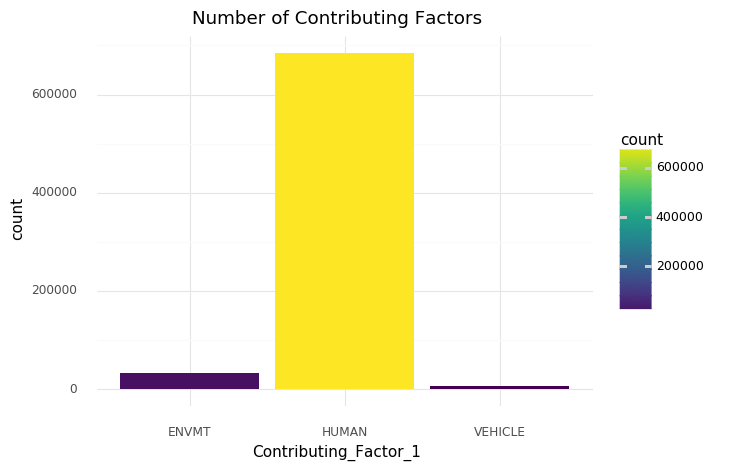

<ggplot: (-9223371954400374426)>

In [29]:
(ggplot(plt_df, aes(x='Contributing_Factor_1', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + theme_minimal()
 + ggtitle('Number of Contributing Factors')
)

In [30]:
plt_df = (df
 .groupby(['Number_of_Occupants'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

C:\Users\laure\Anaconda3\lib\site-packages\plotnine\layer.py:431: UserWarning: position_stack : Removed 21 rows containing missing values.
  data = self.position.setup_data(self.data, params)


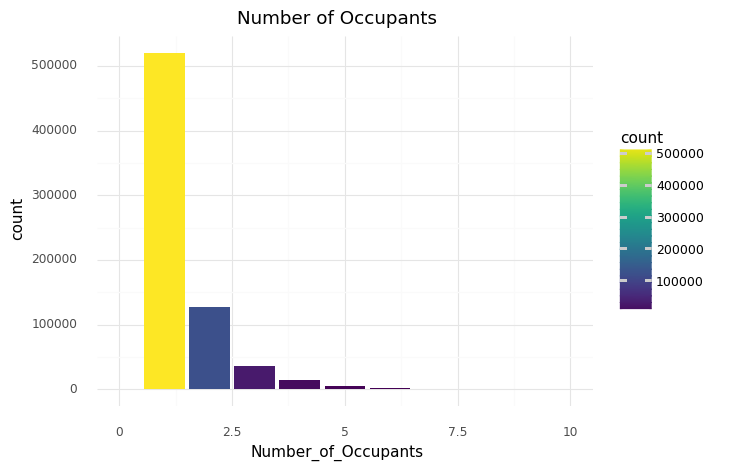

<ggplot: (-9223371954400519627)>

In [31]:
(ggplot(plt_df, aes(x='Number_of_Occupants', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + theme_minimal()
 + ggtitle('Number of Occupants')
 + xlim(0, 10)
)

In [32]:
plt_df = (df
 .groupby(['Action_Prior_to_Accident'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

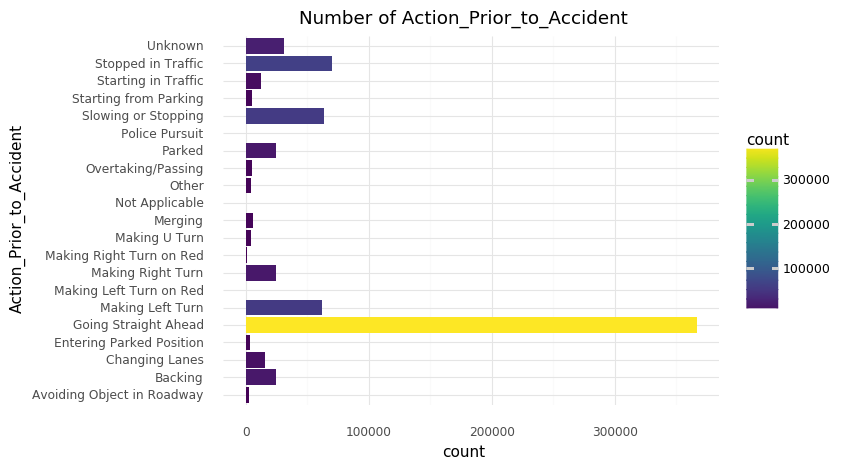

<ggplot: (82454290131)>

In [33]:
(ggplot(plt_df, aes(x='Action_Prior_to_Accident', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + coord_flip()
 + theme_minimal()
 + ggtitle('Number of Action_Prior_to_Accident')
)

In [34]:
plt_df = (df
 .groupby(['Vehicle_Make'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

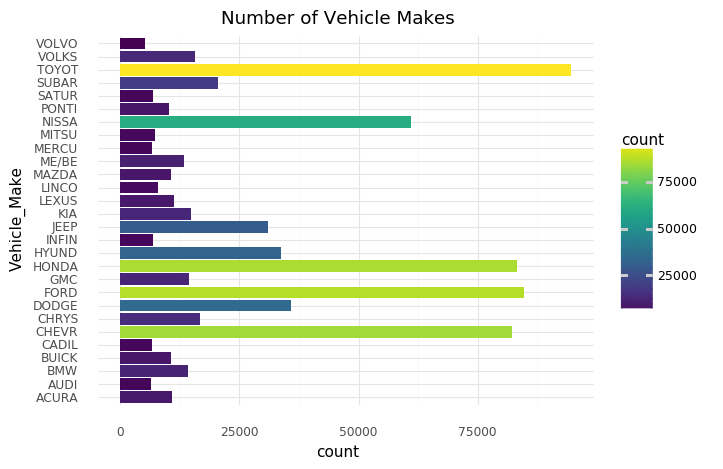

<ggplot: (-9223371954400453565)>

In [35]:
(ggplot(plt_df, aes(x='Vehicle_Make', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + coord_flip()
 + theme_minimal()
 + ggtitle('Number of Vehicle Makes')
)

#### Does this data correlate with vehicle sales, or are Toyotas more prone to accidents?

In [36]:
df2 = pd.read_csv('Vehicle_Snowmobile_Boat_Registrations.csv')
print(df2.shape)
df2.head(2)

(11936667, 20)


,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,BOAT,999999999999,BOT,RYE,NY,10580,WESTCHESTER,1940.00,FAIRF,BOAT,GAS,nan,nan,nan,03/09/2017,04/30/2020,,N,N,N
1,VEH,9999236,HIS,ROSLYN,NY,11576,NASSAU,1937.00,CHRY,4DSD,GAS,6300.00,nan,nan,05/10/2018,06/23/2019,BK,N,N,N


In [37]:
df2.columns = df2.columns.str.replace("[ ]", "_")

In [38]:
df2 = df2.loc[df2['Record_Type'].str.contains('VEH')]

In [39]:
df2 = df2.loc[df2['State'].str.contains('NY')]

In [40]:
print(df2.shape)

(10513274, 20)


In [41]:
df2.head()

,Record_Type,VIN,Registration_Class,City,State,Zip,County,Model_Year,Make,Body_Type,Fuel_Type,Unladen_Weight,Maximum_Gross_Weight,Passengers,Reg_Valid_Date,Reg_Expiration_Date,Color,Scofflaw_Indicator,Suspension_Indicator,Revocation_Indicator
1,VEH,9999236,HIS,ROSLYN,NY,11576,NASSAU,1937.00,CHRY,4DSD,GAS,6300.00,nan,nan,05/10/2018,06/23/2019,BK,N,N,N
10,VEH,9996,MOT,OLD BROOKVILLE,NY,11545,NASSAU,1951.00,NIMBU,MCY,GAS,408.00,nan,nan,04/07/2018,04/30/2019,DK RD,N,N,N
23,VEH,9992313,PAS,CAMDEN,NY,13316,ONEIDA,1924.00,FORD,CONV,GAS,1527.00,nan,nan,07/12/2017,07/06/2019,BK,N,N,N
37,VEH,99906,SPC,BROOKLYN,NY,11232,KINGS,2005.00,MANIT,P/SH,PROPANE,7800.00,nan,nan,11/21/2018,12/31/2019,YW,N,N,N
49,VEH,99899,MOT,WEST BABYLON,NY,11704,SUFFOLK,1969.00,DUCAT,MCY,GAS,250.00,nan,nan,05/01/2018,04/30/2019,RD,N,N,N


In [43]:
df2['Make_Count'] = df2['Make'].map(df2['Make'].value_counts())

In [44]:
df2 = df2[df2['Make_Count'] > 50000]

In [45]:
plt_df = (df2
 .groupby(['Make'])
 .apply(lambda x: pd.Series(dict(
     count = x.shape[0]
 )))
 .reset_index()
)

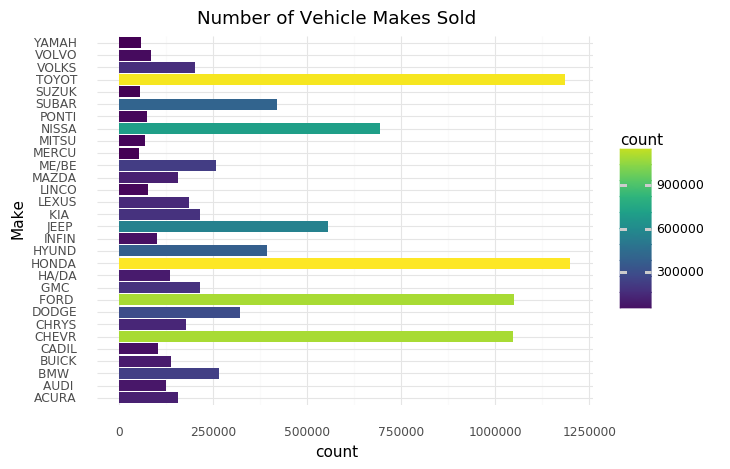

<ggplot: (-9223371954400452692)>

In [46]:
(ggplot(plt_df, aes(x='Make', y='count', fill='count')) 
 + geom_bar(stat='identity')
 + coord_flip()
 + theme_minimal()
 + ggtitle('Number of Vehicle Makes Sold')
)

#### Observation:
The number of vehicle makes sold correlates with the number of vehicle makes in accidents.

## Initial Model

In [15]:
from sklearn.model_selection import train_test_split

In [ ]:
# drop the event type that is not entered.
# new column where not applicable = 0, anything else = 1
# sample 30000 rows

In [16]:
df = df[df['Event_Type'] != 'Not Entered']

In [48]:
diff_dict = {'Not Applicable' : 1, 'Unknown': 0,
       'Snow Embankment, Collision With Fixed Object': 0,
       'Building/Wall, Collision With Fixed Object': 0,
       'Light Support/Utility Pole, Collision With Fixed Object': 0,
       'Other Motor Vehicle, Collision With': 0,
       'Fence, Collision With Fixed Object': 0, 'Overturned, Non-Collision': 0,
       'Tree, Collision With Fixed Object': 0,
       'Other Fixed Object*, Collision With Fixed Object': 0,
       'Guide Rail - Not At End, Collision With Fixed Object': 0,
       'Fire Hydrant, Collision With Fixed Object': 0,
       'Sign Post, Collision With Fixed Object': 0,
       'Earth Embankment/Rock Cut/Ditch, Collision With Fixed Object': 0,
       'Culver/Head Wall, Collision With Fixed Object': 0,
       'Other Object (Not Fixed)*, Collision With': 0,
       'Other*, Non-Collision': 0,
       'Bridge Structure, Collision With Fixed Object': 0,
       'Curbing, Collision With Fixed Object': 0,
       'Barrier, Collision With Fixed Object': 0,
       'Guide Rail - End, Collision With Fixed Object': 0, 'Deer': 0,
       'Submersion, Non-Collision': 0,
       'Median - Not At End': 0, 'Collision With Fixed Object': 0,
       'Pedestrian, Collision With': 0, 'Animal, Collision With': 0,
       'Railroad Train, Collision With': 0, 'Other Pedestrian': 0,
       'Median - End, Collision With Fixed Object': 0,
       'Fire/Explosion, Non-Collision': 0,
       'Crash Cushion, Collision With Fixed Object': 0,
       'Ran Off Roadway Only': 0, 'Non-Collision': 0, 'Bicyclist, Collision With': 0,
       'In-Line Skater, Collision With' : 0}

In [49]:
df['Event_Type_Cat'] = df['Event_Type'].map(diff_dict)

In [54]:
df = df.dropna()

In [57]:
df['Event_Type_Cat'] = df['Event_Type_Cat'].astype(int)

In [58]:
# Randomly sample elements from your dataframe
df = df.sample(n=30000)

In [59]:
df.shape

(30000, 19)

# Classification for Action_Prior_to_Accident

In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\laure\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
X = pd.get_dummies(df[['Vehicle_Body_Type', 'Registration_Class',
       'Vehicle_Make', 'Type_/_Axles_of_Truck_or_Bus',
       'Direction_of_Travel', 'Fuel_Type', 'Vehicle_Year',
       'State_of_Registration', 'Number_of_Occupants', 
       'Engine_Cylinders', 'Contributing_Factor_1', 'Action_Prior_to_Accident']])
X.head(2)

,Vehicle_Year,Number_of_Occupants,Engine_Cylinders,Vehicle_Body_Type_2 DOOR SEDAN,Vehicle_Body_Type_4 DOOR SEDAN,Vehicle_Body_Type_AMBULANCE,Vehicle_Body_Type_BUS (OMNIBUS),Vehicle_Body_Type_CONVERTIBLE,Vehicle_Body_Type_CUSTOM,Vehicle_Body_Type_DELIVERY TRUCK,...,Action_Prior_to_Accident_Not Applicable,Action_Prior_to_Accident_Other,Action_Prior_to_Accident_Overtaking/Passing,Action_Prior_to_Accident_Parked,Action_Prior_to_Accident_Police Pursuit,Action_Prior_to_Accident_Slowing or Stopping,Action_Prior_to_Accident_Starting from Parking,Action_Prior_to_Accident_Starting in Traffic,Action_Prior_to_Accident_Stopped in Traffic,Action_Prior_to_Accident_Unknown
280953,2005,1,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807802,2005,1,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# y = pd.get_dummies(df[['Action_Prior_to_Accident']])
# y = df['Event_Type'].astype('category').cat.codes
y = df['Event_Type_Cat']

In [65]:
y.shape

(30000,)

In [67]:
def plot_confusion_matrix(cm, normalize=True, digits=4):
    plt_df = (pd.DataFrame(cm)
              .reset_index()
              .melt(id_vars='index')
              .assign(index = lambda d: pd.Categorical(d['index'], d['index'].unique()[::-1], ordered=True),
                      variable = lambda d: pd.Categorical(d['variable'], d['variable'].unique(), ordered=True))
              .rename(columns={'index':'true label', 'variable':'predicted label'})
             )
    
    if normalize:
        plt_df = (plt_df
                  .assign(true_total = lambda d: d.groupby('true label')['value'].transform(lambda x: x.sum()))
                  .assign(value = lambda d: (d['value'] / d['true_total']).round(digits))
                 )
        
    plt = (ggplot(plt_df, aes(x='predicted label', y='true label'))
            + geom_tile(aes(fill='value')) 
            + geom_text(aes(label='value'))
            + theme_minimal()
            + scale_fill_gradient(low = "snow", high = "steelblue")
            + theme(legend_title=element_blank())
           )
    
    return plt

## Data 

In [68]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=0)

In [69]:
X_tr.shape

(22500, 138)

## Logistic

In [70]:
%%time
params = {
    'C': np.logspace(-2, 2, num=10)
}

mod = LogisticRegression()
gscv = GridSearchCV(mod, params, cv=5, refit=True, return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gscv.fit(X_tr, y_tr)

Wall time: 10.9 s


In [71]:
print(gscv.best_estimator_)
cv_results = pd.DataFrame(gscv.cv_results_)
print('Train score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_train_score'].values[0])
print('Test score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_test_score'].values[0])

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Train score: 0.8647666675673525
Test score: 0.8647555555555556


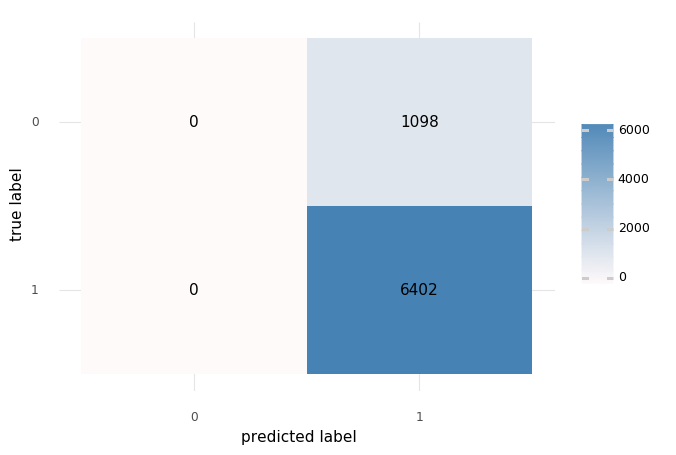

<ggplot: (93685074696)>

In [72]:
pred = gscv.best_estimator_.predict(X_te)
cm = confusion_matrix(y_te, pred)
plot_confusion_matrix(cm, normalize=False)
# 2x2 grid

## Gradient Boosting

In [ ]:
%%time
params = { 
    'n_estimators': [50, 100],
    'subsample': [0.25, 0.50],
    'max_depth' : [2, 4, 6],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [50, 100]
}

mod = GradientBoostingClassifier()
gscv = GridSearchCV(mod, params, cv=5, refit=True, return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    gscv.fit(X_tr, y_tr)

In [ ]:
print(gscv.best_estimator_.feature_importances_)

In [ ]:
print(gscv.best_estimator_)
cv_results = pd.DataFrame(gscv.cv_results_)
print('Train score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_train_score'].values[0])
print('Test score:', cv_results.loc[lambda d: d['rank_test_score'] == 1, 'mean_test_score'].values[0])

In [ ]:
pred = gscv.best_estimator_.predict(X_te)
cm = confusion_matrix(y_te, pred)
plot_confusion_matrix(cm, normalize=False)

# Conclusion

Most accidents occur with the following:
* One occupant
* Going straight ahead
* Human error
* Newer vehicles (2005-2016)
* Vehicle type is a four door sedan or suburban